In [58]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("./data/train.csv")
df.head()

C:\Users\Vinicius\AppData\Local\Temp\ipykernel_20348\4030413523.py:1: DtypeWarning: Columns (0: StateHoliday) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data/train.csv")


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [18]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  str   
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(1), str(1)
memory usage: 69.8+ MB


In [19]:
df["StateHoliday"].value_counts()

StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64

In [ ]:
df["StateHoliday"] = df["StateHoliday"].isin(["a", "b", "c"]).astype(int)

# Summarizing as 0 and 1 types of holidays

In [21]:
df["StateHoliday"].value_counts()

StateHoliday
0    986159
1     31050
Name: count, dtype: int64

## Lab 2

In [22]:
df.shape

(1017209, 9)

In [24]:
print(f"There are {len(df["Store"].unique())} Stores in our DF")

There are 1115 Stores in our DF


In [39]:
df_10 = df.loc[df["Store"].isin(df["Store"].sample(10, random_state=1502))]
df_10

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
23,24,5,2015-07-31,14190,1082,1,1,0,1
46,47,5,2015-07-31,9379,1021,1,1,0,1
155,156,5,2015-07-31,8828,821,1,1,0,1
263,264,5,2015-07-31,8303,992,1,1,0,1
266,267,5,2015-07-31,11326,1217,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016447,353,2,2013-01-01,3139,820,1,0,1,1
1016857,763,2,2013-01-01,0,0,0,0,1,1
1016888,794,2,2013-01-01,0,0,0,0,1,1
1016956,862,2,2013-01-01,0,0,0,0,1,1


In [42]:
df_10.groupby(["Store"]).agg({"Sales": "mean"}).sort_values(by="Store", ascending=True)

,Sales
Store,
24,7763.773885
47,5946.666667
156,5779.171975
264,5851.901274
267,7731.106157
353,5579.376858
763,5097.873673
794,2553.475584
862,7128.519108


In [50]:
df_10.groupby(["Store"])["Sales"].idxmax().sort_values()

Store
47      34611
353    101817
267    245014
794    245456
24     408443
264    455513
763    619917
156    627115
862    627821
864    947828
Name: Sales, dtype: int64

## Lab 3

In [51]:
df_10 = df_10.set_index(["Date"])
df_10.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,24,5,14190,1082,1,1,0,1
2015-07-31,47,5,9379,1021,1,1,0,1
2015-07-31,156,5,8828,821,1,1,0,1
2015-07-31,264,5,8303,992,1,1,0,1
2015-07-31,267,5,11326,1217,1,1,0,1


In [53]:
df_10.index = pd.to_datetime(df_10.index)
df_10.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,24,5,14190,1082,1,1,0,1
2015-07-31,47,5,9379,1021,1,1,0,1
2015-07-31,156,5,8828,821,1,1,0,1
2015-07-31,264,5,8303,992,1,1,0,1
2015-07-31,267,5,11326,1217,1,1,0,1


In [65]:
df_plot = df_10.groupby(["DayOfWeek", "Store"]).agg({"Sales": "mean"}).reset_index()
df_plot

,DayOfWeek,Store,Sales
0,1,24,10860.119403
1,1,47,7877.686567
2,1,156,8707.940299
3,1,264,8320.291045
4,1,267,8969.253731
...,...,...,...
65,7,353,7255.343284
66,7,763,0.000000
67,7,794,0.000000
68,7,862,0.000000


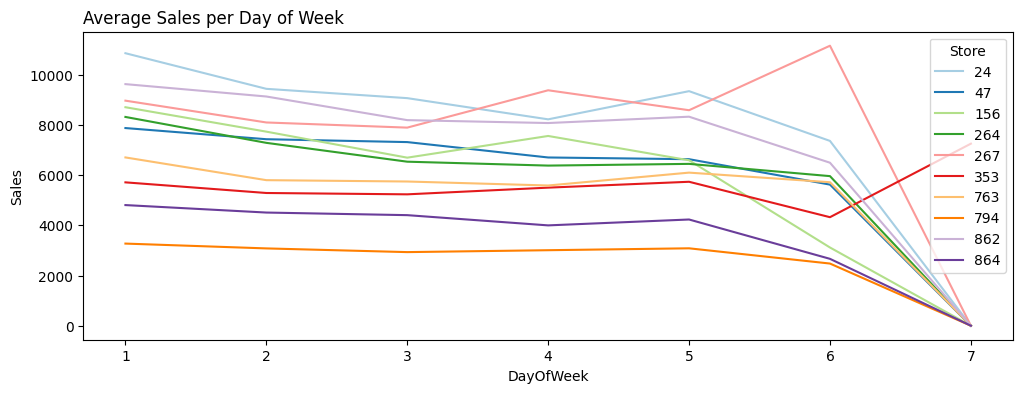

In [78]:
plt.figure(figsize=(12, 4))
sns.lineplot(
    df_plot, 
    x="DayOfWeek", 
    y="Sales",
    hue="Store",
    palette="Paired"
)
plt.title("Average Sales per Day of Week", loc="left")
plt.show()

## Lab 4

In [79]:
def standardization(series):
    return (series - series.mean()) / series.std()

In [82]:
df_10["Sales_Standard"] = df_10.groupby(["Store"])["Sales"].transform(standardization)
df_10.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales_Standard
Date,,,,,,,,,
2015-07-31,24,5,14190,1082,1,1,0,1,1.504863
2015-07-31,47,5,9379,1021,1,1,0,1,1.103818
2015-07-31,156,5,8828,821,1,1,0,1,0.832283
2015-07-31,264,5,8303,992,1,1,0,1,0.697361
2015-07-31,267,5,11326,1217,1,1,0,1,0.853360


In [84]:
df_plot_2 = df_10.groupby(["DayOfWeek", "Store"]).agg({"Sales_Standard": "mean"})

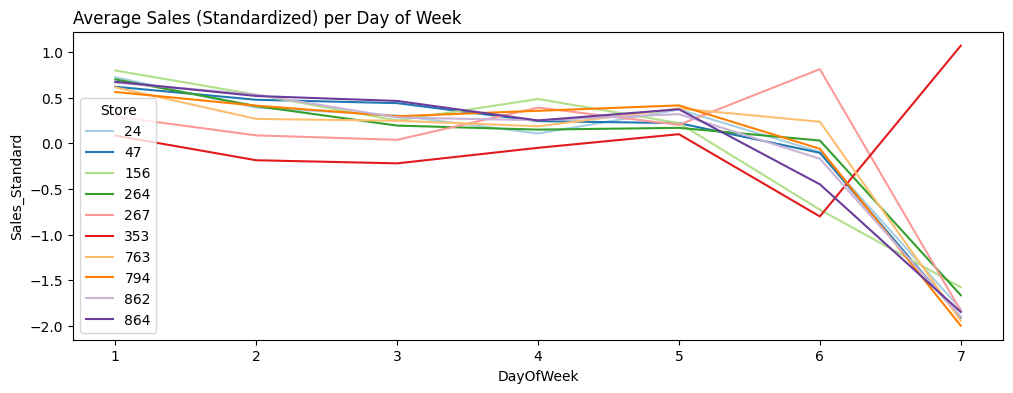

In [85]:
plt.figure(figsize=(12, 4))
sns.lineplot(
    df_plot_2, 
    x="DayOfWeek", 
    y="Sales_Standard",
    hue="Store",
    palette="Paired"
)
plt.title("Average Sales (Standardized) per Day of Week", loc="left")
plt.show()

## Lab 5

In [89]:
df_d7 = df_10.loc[df_10["DayOfWeek"]==7].copy()
df_d7.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales_Standard
Date,,,,,,,,,
2015-07-26,24,7,0,0,0,0,0,0,-1.818083
2015-07-26,47,7,0,0,0,0,0,0,-1.912412
2015-07-26,156,7,0,0,0,0,0,0,-1.577624
2015-07-26,264,7,0,0,0,0,0,0,-1.664922
2015-07-26,267,7,0,0,0,0,0,0,-1.835219


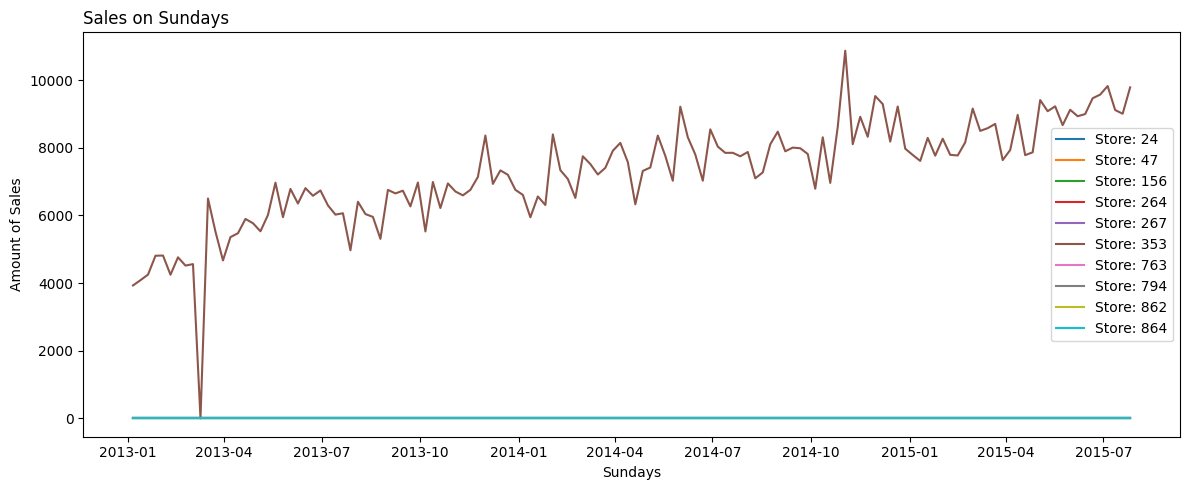

In [92]:
plt.figure(figsize=(12, 5))
for store, data in df_d7.groupby("Store"):
    plt.plot(data.index, data["Sales"], label=f"Store: {store}")

plt.legend()
plt.title("Sales on Sundays", loc="left")
plt.ylabel("Amount of Sales")
plt.xlabel("Sundays")
plt.tight_layout()
plt.show()

## Lab 6

In [93]:
df_clean = df_10.loc[(df_10["DayOfWeek"] != 7) & (df_10["Store"] != 353)]
df_clean.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales_Standard
Date,,,,,,,,,
2015-07-31,24,5,14190,1082,1,1,0,1,1.504863
2015-07-31,47,5,9379,1021,1,1,0,1,1.103818
2015-07-31,156,5,8828,821,1,1,0,1,0.832283
2015-07-31,264,5,8303,992,1,1,0,1,0.697361
2015-07-31,267,5,11326,1217,1,1,0,1,0.853360


In [95]:
df_clean["Sales_Standard"] = df_clean.groupby(["Store"])["Sales"].transform(standardization)
df_clean

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales_Standard
Date,,,,,,,,,
2015-07-31,24,5,14190,1082,1,1,0,1,1.658935
2015-07-31,47,5,9379,1021,1,1,0,1,1.162338
2015-07-31,156,5,8828,821,1,1,0,1,0.689866
2015-07-31,264,5,8303,992,1,1,0,1,0.530960
2015-07-31,267,5,11326,1217,1,1,0,1,0.765726
...,...,...,...,...,...,...,...,...,...
2013-01-01,267,2,0,0,0,0,1,1,-2.984181
2013-01-01,763,2,0,0,0,0,1,1,-3.445182
2013-01-01,794,2,0,0,0,0,1,1,-3.724863


In [ ]:
intraweek = df_clean.groupby(["DayOfWeek", "Store"]).agg({"Sales_Standard": "mean"}).reset_index()

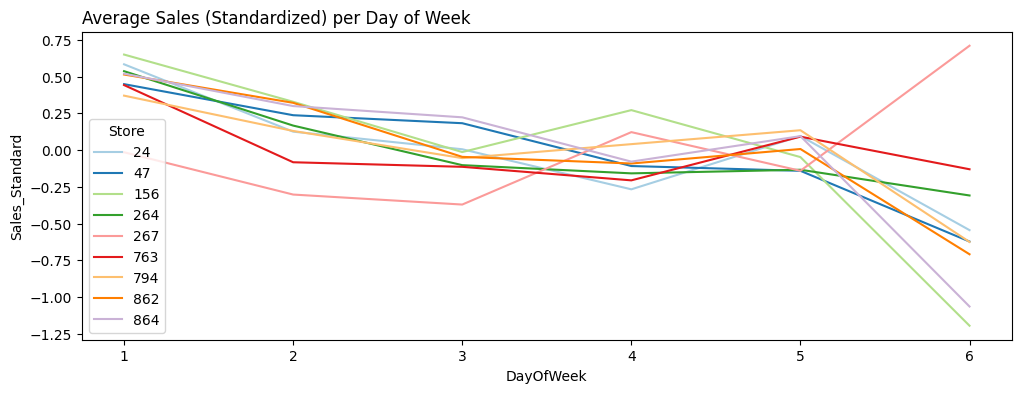

In [99]:
plt.figure(figsize=(12, 4))
sns.lineplot(
    intraweek, 
    x="DayOfWeek", 
    y="Sales_Standard",
    hue="Store",
    palette="Paired"
)
plt.title("Average Sales (Standardized) per Day of Week", loc="left")
plt.show()

## Lab 7

In [100]:
df.groupby(["Promo"]).agg({"Sales": "mean"})

,Sales
Promo,
0,4406.050805
1,7991.152046


In [113]:
promo_uplift = df.groupby(["Store", "Promo"]).agg({"Sales": "mean"}).unstack()
promo_uplift

Sales              
Promo             0             1
Store                            
1       3198.994845   5152.886111
2       2855.058419   6172.816667
3       3967.596220   8608.666667
4       6568.939863  10370.511111
5       2582.271478   5944.266667
...             ...           ...
1111    3073.487973   6395.294444
1112    5975.537801  12490.363889
1113    4400.362543   7320.086111
1114   14477.742268  21601.497222
1115    4082.221649   7073.266667

[1115 rows x 2 columns]

In [117]:
promo_uplift["diff"] = (promo_uplift["Sales", 1] - promo_uplift["Sales", 0]) / promo_uplift["Sales", 0]

In [118]:
promo_uplift["diff"].nlargest(5)

Store
198    2.258195
607    1.889831
543    1.759064
575    1.737234
271    1.620440
Name: diff, dtype: float64

In [119]:
promo_uplift["diff"].nsmallest(5)

Store
274   -0.061742
262    0.021504
948    0.028717
676    0.036924
353    0.045898
Name: diff, dtype: float64